
Using okun.dat (https://www.stata.com/data/s4poe4/okun.dta) replicate the finite distributed lags example in Section 9.2 (p. 341, HGL). Obtain the findings in Table 9.2 and also obtain the correlogram (like in Figure 9.8) for the unemployment with 24 lags (syntax is "ac," see https://www.stata.com/manuals/tscorrgram.pdf). Note that the lag operator in Stata is "L." (e.g., L.u means the first lag of u and L(1/2).u means the first and second lags of u).





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           g |         98    1.276531    .6469279       -1.4        2.5
           u |         98    5.704082    1.132638        3.9        9.6



        time variable:  date, 1985q2 to 2009q3
                delta:  1 quarter


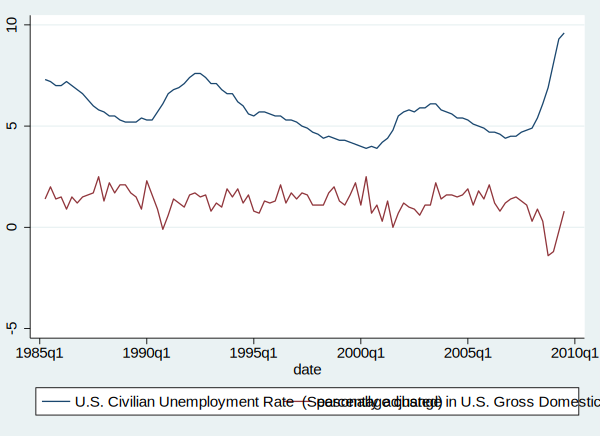

In [7]:
clear all 
use https://www.stata.com/data/s4poe4/okun.dta

summ

gen date = tq(1985q2) + _n-1
format %tq date
tsset date

tsline u g

In [8]:
regress D.u L(0/3).g


      Source |       SS           df       MS      Number of obs   =        95
-------------+----------------------------------   F(4, 90)        =     42.23
       Model |  5.13367789         4  1.28341947   Prob > F        =    0.0000
    Residual |  2.73516422        90  .030390714   R-squared       =    0.6524
-------------+----------------------------------   Adj R-squared   =    0.6370
       Total |  7.86884211        94  .083711086   Root MSE        =    .17433

------------------------------------------------------------------------------
         D.u |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           g |
         --. |  -.2020526   .0330131    -6.12   0.000     -.267639   -.1364663
         L1. |  -.1645352   .0358175    -4.59   0.000    -.2356929   -.0933774
         L2. |   -.071556   .0353043    -2.03   0.046    -.1416941   -.0014179
         L3. |    .003303   .036260

Using phillips_aus.dat (https://www.stata.com/data/s4poe4/phillips_aus.dta) replicate the ARDL given in Equation 9.57 (p. 368, HGL). Obtain the findings in Table 9.4. What is your conclusion after checking AIC and SC? (syntax for AIC and SC is "estat ic")

In [58]:
clear all
use https://www.stata.com/data/s4poe4/phillips_aus.dta

gen date = tq(1981q1) + _n-1
format %tq date
tsset date
summ






        time variable:  date, 1981q1 to 2003q3
                delta:  1 quarter


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         inf |         91    .8043956    .6458263        -.4        2.6
           u |         91    7.034066    1.818804          4       10.8
        date |         91         129    26.41338         84        174


In [59]:
reg L(0/4).inf D.u


      Source |       SS           df       MS      Number of obs   =        87
-------------+----------------------------------   F(5, 81)        =     13.71
       Model |  15.4337676         5  3.08675353   Prob > F        =    0.0000
    Residual |  18.2333588        81  .225103195   R-squared       =    0.4584
-------------+----------------------------------   Adj R-squared   =    0.4250
       Total |  33.6671264        86  .391478214   Root MSE        =    .47445

------------------------------------------------------------------------------
         inf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         inf |
         L1. |   .2354401   .1015555     2.32   0.023     .0333765    .4375037
         L2. |    .121328   .1037571     1.17   0.246    -.0851161    .3277722
         L3. |   .1676895   .1049597     1.60   0.114    -.0411473    .3765264
         L4. |   .2819156   .101380

In [60]:
program modelsel
    scalar aic = ln(e(rss)/e(N))+2*e(rank)/e(N)
    scalar sc = ln(e(rss)/e(N))+e(rank)*ln(e(N))/e(N)
    scalar obs = e(N)
    scalar list aic sc obs
end 

In [62]:
quietly regress inf L.inf L(0/1).D.u
modelsel



       aic =  -1.255973
        sc = -1.1441242
       obs =         89


In [63]:
forvalues q=0/1 {
    forvalues p=1/6 {
    quietly regress L(0/`p').inf L(0/`q').D.u if date >= tq(1988q3)
    display "p=`p' q=`q'"
    modelsel
    }
} 


p=1 q=0
       aic = -1.7145721
        sc = -1.6107586
       obs =         61
p=2 q=0
       aic = -1.6827262
        sc = -1.5443083
       obs =         61
p=3 q=0
       aic = -1.6617917
        sc = -1.4887692
       obs =         61
p=4 q=0
       aic = -1.6495316
        sc = -1.4419047
       obs =         61
p=5 q=0
       aic = -1.6175512
        sc = -1.3753198
       obs =         61
p=6 q=0
       aic = -1.5892517
        sc = -1.3124158
       obs =         61
p=1 q=1
       aic = -1.6893953
        sc = -1.5509773
       obs =         61
p=2 q=1
       aic = -1.6578292
        sc = -1.4848067
       obs =         61
p=3 q=1
       aic = -1.6362272
        sc = -1.4286002
       obs =         61
p=4 q=1
       aic = -1.6189343
        sc = -1.3767029
       obs =         61
p=5 q=1
       aic = -1.5875147
        sc = -1.3106788
       obs =         61
p=6 q=1
       aic = -1.5600387
        sc = -1.2485983
       obs =         61


In [40]:
reg L(0/4).inf D.u if date > tq(1986q2)
estat ic



      Source |       SS           df       MS      Number of obs   =        69
-------------+----------------------------------   F(5, 63)        =      3.74
       Model |  3.01253229         5  .602506457   Prob > F        =    0.0050
    Residual |  10.1451489        63  .161034109   R-squared       =    0.2290
-------------+----------------------------------   Adj R-squared   =    0.1678
       Total |  13.1576812        68  .193495311   Root MSE        =    .40129

------------------------------------------------------------------------------
         inf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         inf |
         L1. |    .385352   .1193678     3.23   0.002     .1468146    .6238895
         L2. |  -.0545529   .1278789    -0.43   0.671    -.3100985    .2009928
         L3. |   .0214829   .1283735     0.17   0.868    -.2350511     .278017
         L4. |   .1454277   .12310